In [50]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [51]:
def min_max_scaling(X,min_val,max_val):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    
    # If the column has constant values (min == max), return the original values unscaled
    if X_min == X_max:
        return X
    
    # Perform scaling if min != max
    X_scaled = (X - X_min) / (X_max - X_min) * (max_val - min_val) + min_val

    
    return X_scaled

In [52]:
nr_people_pop1 = 100
nr_people_pop2 = 50
nr_people_pop3 = 300
total_humans = nr_people_pop1+ nr_people_pop2+nr_people_pop3
minaf_pop1 = 0.2
minaf_pop2 = 0.5
minaf_pop3 = 0.5

majaf_pop1 = 0.4
majaf_pop2 = 0.2
majaf_pop3 = 0.1

hetaf_pop1 = 1 - minaf_pop1 - majaf_pop1
hetaf_pop2 = 1 - minaf_pop2 - majaf_pop2
hetaf_pop3 = 1 - minaf_pop3 - majaf_pop3

pheno_pop1 = 0.3
pheno_pop2 = 0.7
pheno_pop3 = 1

In [53]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps


In [54]:
minaf = [minaf_pop1]*nr_people_pop1 + [minaf_pop2]*nr_people_pop2 + [minaf_pop3]*nr_people_pop3
hetaf = [hetaf_pop1]*nr_people_pop1 + [hetaf_pop2]*nr_people_pop2 + [hetaf_pop3]*nr_people_pop3
majaf = [majaf_pop1]*nr_people_pop1 + [majaf_pop2]*nr_people_pop2 + [majaf_pop3]*nr_people_pop3

In [55]:
pop = ['pop1']*nr_people_pop1 + ['pop2']*nr_people_pop2 +  ['pop3']*nr_people_pop3
pop_nr = [nr_people_pop1]*nr_people_pop1 + [nr_people_pop2]*nr_people_pop2 +  [nr_people_pop3]*nr_people_pop3
risk = [pheno_pop1]*nr_people_pop1 + [pheno_pop2]*nr_people_pop2 +  [pheno_pop3]*nr_people_pop3

In [56]:
humans = pd.DataFrame()
humans['snp'] = snps
humans['snp_nr'] = snps_nr
humans['snp_nr'] = humans['snp_nr']/humans['snp_nr'].max()

humans['minaf'] = minaf
humans['hetaf'] = hetaf
humans['majaf'] = majaf
humans['pop'] = pop
humans['pop_quantity'] = pop_nr
humans['risk'] = risk
#humans['risk'] = min_max_scaling(humans['risk'],-1,1)
#humans['risk'] = (humans['risk'] - humans['risk'].mean()) / humans['risk'].std()

In [57]:
pheno_pop1 = humans[humans['pop']=='pop1']['risk'].mean()
pheno_pop2 = humans[humans['pop']=='pop2']['risk'].mean()
pheno_pop3 = humans[humans['pop']=='pop3']['risk'].mean()

In [58]:
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_het = count_total_AFs.loc[0].snp
total_major = count_total_AFs.loc[1].snp

In [59]:
total_major

0.17777777777777778

In [60]:
humans = humans[humans['snp'] != 0]
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_major = count_total_AFs.loc[1].snp
humans

,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,risk
0,-1,0.133333,0.2,0.4,0.4,pop1,100,0.3
1,-1,0.133333,0.2,0.4,0.4,pop1,100,0.3
2,-1,0.133333,0.2,0.4,0.4,pop1,100,0.3
3,-1,0.133333,0.2,0.4,0.4,pop1,100,0.3
4,-1,0.133333,0.2,0.4,0.4,pop1,100,0.3
...,...,...,...,...,...,...,...,...
445,1,0.200000,0.5,0.4,0.1,pop3,300,1.0
446,1,0.200000,0.5,0.4,0.1,pop3,300,1.0
447,1,0.200000,0.5,0.4,0.1,pop3,300,1.0
448,1,0.200000,0.5,0.4,0.1,pop3,300,1.0


In [61]:
total_major

0.2909090909090909

In [62]:
X = humans[['snp']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

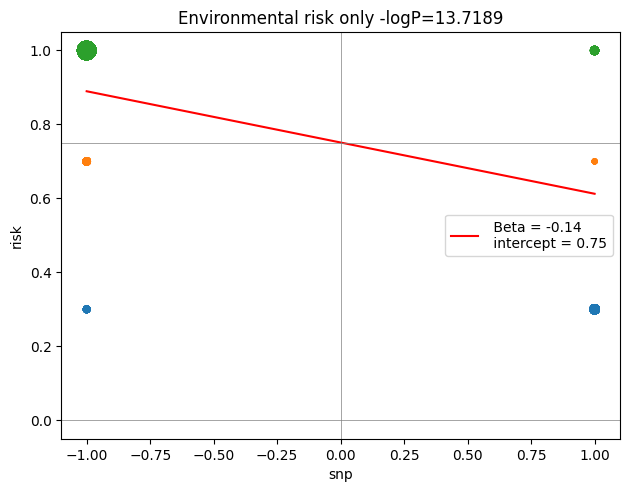

In [63]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [64]:
# manually

In [65]:
def manual_ols(X,y):
    X = np.array(X)
    X = np.column_stack([np.ones(len(X)), X])
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    # Compute beta_matrix using the formula (X.T @ X)^(-1) @ X.T @ y
    XTX = X.T @ X
    try:
        XTX_inv = np.linalg.inv(XTX)
    except np.linalg.LinAlgError:
        raise ValueError("Matrix X.T @ X is singular and cannot be inverted.")
    
    beta_matrix = XTX_inv @ X.T @ y
    
    return beta_matrix

In [66]:
X = humans['snp']
y = humans['risk']

In [67]:
beta_matrix = manual_ols(X, y)
try:
    [intercept_manual, beta_manual] = beta_matrix
    print("intercept")
    print(np.round(intercept_manual,2))
    print("slope")
    print(np.round(beta_manual,2))
except:
    print("only slope")
    print(np.round(beta_matrix[0]))

intercept
0.75
slope
-0.14


In [34]:
# Changing the phenotype

In [68]:
X = [-1*minaf_pop1/total_minor, 1*majaf_pop1/total_major]+[-1*minaf_pop2/total_minor, 1*majaf_pop2/total_major]+[-1*minaf_pop3/total_minor, 1*majaf_pop3/total_major]
y = [pheno_pop1, pheno_pop1]+[pheno_pop2, pheno_pop2]+[pheno_pop3, pheno_pop3]

In [44]:
"""
X = [-1*minaf_pop1*nr_people_pop1, 0*hetaf_pop1*nr_people_pop1, 1*majaf_pop1*nr_people_pop1]+[-1*minaf_pop2*nr_people_pop2, 0*hetaf_pop2*nr_people_pop2, 1*majaf_pop2*nr_people_pop2]+[-1*minaf_pop3*nr_people_pop3, 0*hetaf_pop3*nr_people_pop3, 1*majaf_pop3*nr_people_pop3]
y = [pheno_pop1*nr_people_pop1,pheno_pop1*nr_people_pop1, pheno_pop1*nr_people_pop1]+[pheno_pop2*nr_people_pop2,pheno_pop2*nr_people_pop2, pheno_pop2*nr_people_pop2]+[pheno_pop3*nr_people_pop3,pheno_pop3*nr_people_pop3, pheno_pop3*nr_people_pop3]
"""

'\nX = [-1*minaf_pop1*nr_people_pop1, 0*hetaf_pop1*nr_people_pop1, 1*majaf_pop1*nr_people_pop1]+[-1*minaf_pop2*nr_people_pop2, 0*hetaf_pop2*nr_people_pop2, 1*majaf_pop2*nr_people_pop2]+[-1*minaf_pop3*nr_people_pop3, 0*hetaf_pop3*nr_people_pop3, 1*majaf_pop3*nr_people_pop3]\ny = [pheno_pop1*nr_people_pop1,pheno_pop1*nr_people_pop1, pheno_pop1*nr_people_pop1]+[pheno_pop2*nr_people_pop2,pheno_pop2*nr_people_pop2, pheno_pop2*nr_people_pop2]+[pheno_pop3*nr_people_pop3,pheno_pop3*nr_people_pop3, pheno_pop3*nr_people_pop3]\n'

In [45]:
"""
X = [-1*minaf_pop1, 1*majaf_pop1]+[-1*minaf_pop2, 1*majaf_pop2]+[-1*minaf_pop3, 1*majaf_pop3]
y = [pheno_pop1, pheno_pop1]+[pheno_pop2, pheno_pop2]+[pheno_pop3, pheno_pop3]
"""

'\nX = [-1*minaf_pop1, 1*majaf_pop1]+[-1*minaf_pop2, 1*majaf_pop2]+[-1*minaf_pop3, 1*majaf_pop3]\ny = [pheno_pop1, pheno_pop1]+[pheno_pop2, pheno_pop2]+[pheno_pop3, pheno_pop3]\n'

In [69]:
beta_matrix = manual_ols(X, y)
try:
    [intercept_manual, beta_manual] = beta_matrix
    print("intercept")
    print(np.round(intercept_manual,2))
    print("slope")
    print(np.round(beta_manual,2))
except:
    print("only slope")
    print(np.round(beta_matrix[0]))

intercept
0.68
slope
-0.15


In [70]:
X = [majaf_pop1/total_major - minaf_pop1/total_minor]+[majaf_pop2/total_major - minaf_pop2/total_minor]+[majaf_pop3/total_major - minaf_pop3/total_minor]
y = [pheno_pop1]+[pheno_pop2]+[pheno_pop3]

In [71]:
beta_matrix = manual_ols(X, y)
try:
    [intercept_manual, beta_manual] = beta_matrix
    print("intercept")
    print(np.round(intercept_manual,2))
    print("slope")
    print(np.round(beta_manual,2))
except:
    print("only slope")
    print(np.round(beta_matrix[0]))

intercept
0.77
slope
-0.45


In [12]:
"""
#changing x and y axis
new_beta = 1/beta
new_intercept = (-1/beta)*intercept
humans['inverted_predicted_risk'] = humans['risk']*new_beta +new_intercept
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='risk', y='snp', data=humans, hue='pop', size='snp_nr', sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['risk'], humans['inverted_predicted_risk'], color='red', label=f' Beta = {new_beta:.2f}\n intercept = {new_intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=new_intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()
"""

'\n#changing x and y axis\nnew_beta = 1/beta\nnew_intercept = (-1/beta)*intercept\nhumans[\'inverted_predicted_risk\'] = humans[\'risk\']*new_beta +new_intercept\n# Create the scatter plot with seaborn, using size to represent pop_quantity\nsns.scatterplot(x=\'risk\', y=\'snp\', data=humans, hue=\'pop\', size=\'snp_nr\', sizes=(20, 200), linewidth=0, legend=False)\n\n# Add the regression line to the plot (no size argument here, as it\'s a line)\nplt.plot(humans[\'risk\'], humans[\'inverted_predicted_risk\'], color=\'red\', label=f\' Beta = {new_beta:.2f}\n intercept = {new_intercept:.2f}\')\n\n# Add thin gray lines at x = 0 and y = 0\nplt.axvline(x=0, color=\'gray\', linestyle=\'-\', linewidth=0.5)  # Vertical line at x = 0\nplt.axhline(y=new_intercept, color=\'gray\', linestyle=\'-\', linewidth=0.5)  # Vertical line at x = 0\nplt.axhline(y=0, color=\'gray\', linestyle=\'-\', linewidth=0.5)\n\n# Adjust layout\nplt.tight_layout()\nplt.title(f"Environmental risk only -logP={logp_value}")

In [13]:
# recalculating phenos based only on mafs

In [28]:

Pheno_min = pheno_pop1*minaf_pop1 + pheno_pop2*minaf_pop2 + pheno_pop3*minaf_pop3
Pheno_het = pheno_pop1*hetaf_pop1 + pheno_pop2*hetaf_pop2 + pheno_pop3*hetaf_pop3
Pheno_maj = pheno_pop1*majaf_pop1 + pheno_pop2*majaf_pop2 + pheno_pop3*majaf_pop3


In [29]:
"""
Pheno_min = (pheno_pop1*minaf_pop1*nr_people_pop1**2 + pheno_pop2*minaf_pop2*nr_people_pop2**2 + pheno_pop3*minaf_pop3*nr_people_pop3**2)/total_humans
Pheno_het = (pheno_pop1*hetaf_pop1*nr_people_pop1**2 + pheno_pop2*hetaf_pop2*nr_people_pop2**2 + pheno_pop3*hetaf_pop3*nr_people_pop3**2)/total_humans
Pheno_maj = (pheno_pop1*majaf_pop1*nr_people_pop1**2 + pheno_pop2*majaf_pop2*nr_people_pop2**2 + pheno_pop3*majaf_pop3*nr_people_pop3**2)/total_humans
"""

'\nPheno_min = (pheno_pop1*minaf_pop1*nr_people_pop1**2 + pheno_pop2*minaf_pop2*nr_people_pop2**2 + pheno_pop3*minaf_pop3*nr_people_pop3**2)/total_humans\nPheno_het = (pheno_pop1*hetaf_pop1*nr_people_pop1**2 + pheno_pop2*hetaf_pop2*nr_people_pop2**2 + pheno_pop3*hetaf_pop3*nr_people_pop3**2)/total_humans\nPheno_maj = (pheno_pop1*majaf_pop1*nr_people_pop1**2 + pheno_pop2*majaf_pop2*nr_people_pop2**2 + pheno_pop3*majaf_pop3*nr_people_pop3**2)/total_humans\n'

In [30]:
"""
Pheno_min = (pheno_pop1*minaf_pop1**2 + pheno_pop2*minaf_pop2**2 + pheno_pop3*minaf_pop3**2)/total_minor
Pheno_het = (pheno_pop1*hetaf_pop1**2 + pheno_pop2*hetaf_pop2**2 + pheno_pop3*hetaf_pop3**2)/total_het
Pheno_maj = (pheno_pop1*majaf_pop1**2 + pheno_pop2*majaf_pop2**2 + pheno_pop3*majaf_pop3**2)/total_major
"""

'\nPheno_min = (pheno_pop1*minaf_pop1**2 + pheno_pop2*minaf_pop2**2 + pheno_pop3*minaf_pop3**2)/total_minor\nPheno_het = (pheno_pop1*hetaf_pop1**2 + pheno_pop2*hetaf_pop2**2 + pheno_pop3*hetaf_pop3**2)/total_het\nPheno_maj = (pheno_pop1*majaf_pop1**2 + pheno_pop2*majaf_pop2**2 + pheno_pop3*majaf_pop3**2)/total_major\n'

In [31]:
X = [-1, 0, 1]
Y = [Pheno_min, Pheno_het, Pheno_maj]

In [32]:
maf_df = pd.DataFrame()
maf_df['snp'] = X
maf_df['risk'] = Y

In [33]:
X = maf_df[['snp']]  # Predictor variable
y = maf_df['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X_with_constant = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_with_constant).fit()

# Extract beta (slope), intercept, and p-value
beta_maf = model.params['snp']
intercept_maf = model.params['const']
p_value_maf = model.pvalues['snp']
logp_value_maf = np.round(-np.log10(p_value_maf),4)

In [34]:
maf_df['predicted_risk_maf'] = model.predict(X_with_constant)

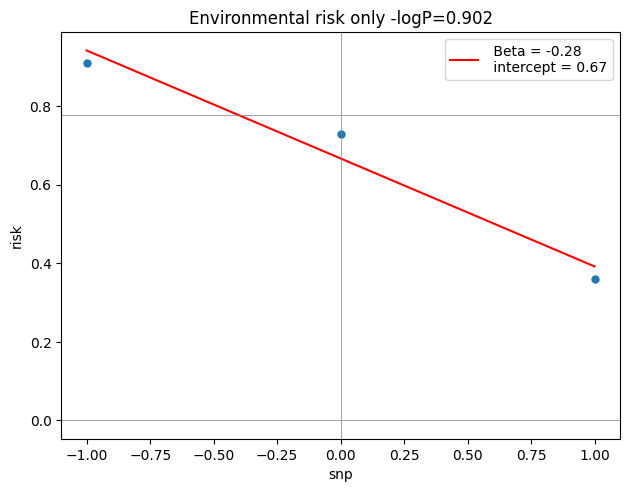

In [35]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=maf_df, sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(maf_df['snp'], maf_df['predicted_risk_maf'], color='red', label=f' Beta = {beta_maf:.2f}\n intercept = {intercept_maf:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layoutA
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value_maf}")
plt.legend()

# Show the plot
plt.show()
plt.close()

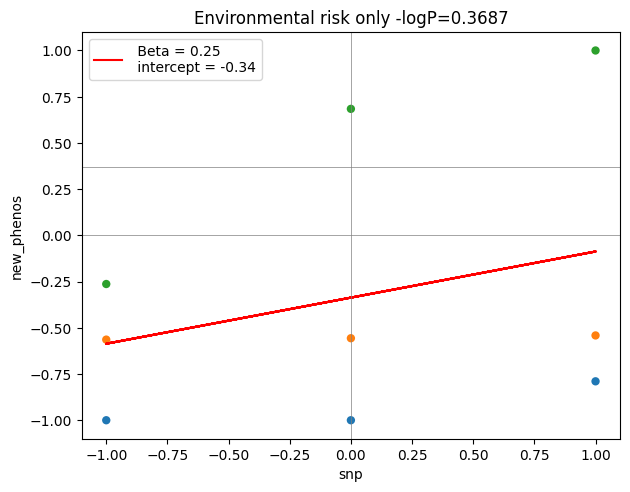